
# Act 3. Series de tiempo

> Alfonso Pineda | A01660394  
Mariana Rincón | A01654973  
Karla González | A01541526  
Salvador Mendoza | A01067783  
Álvaro Morán Errejón | A01638034

**Fecha de entrega:** 17 de noviembre de 2023

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Exploración inicial de los datos

In [ ]:
data = pd.read_csv('/content/dow_jones_index.data')

In [ ]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
data.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [ ]:
columns = ['date','high', 'low', 'volume', 'percent_change_price']
data = data[columns]
data.head()

,date,high,low,volume,percent_change_price
0,1/7/2011,$16.72,$15.78,239655616,3.79267
1,1/14/2011,$16.71,$15.64,242963398,-4.42849
2,1/21/2011,$16.38,$15.60,138428495,-2.47066
3,1/28/2011,$16.63,$15.82,151379173,1.63831
4,2/4/2011,$17.39,$16.18,154387761,5.93325


In [ ]:
data.shape

(750, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  750 non-null    object 
 1   high                  750 non-null    object 
 2   low                   750 non-null    object 
 3   volume                750 non-null    int64  
 4   percent_change_price  750 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 29.4+ KB


In [ ]:
data.isnull().sum()

date                    0
high                    0
low                     0
volume                  0
percent_change_price    0
dtype: int64

In [ ]:
# Elimina el símbolo '$' de la columna 'high'
data['high'] = data['high'].str.replace('$', '').astype(float)

# Elimina el símbolo '$' de la columna 'low'
data['low'] = data['low'].str.replace('$', '').astype(float)

In [ ]:
from dateutil.parser import parse
# Usa la función parse para convertir la columna 'date' en formato de fecha
data['date'] = data['date'].apply(lambda x: parse(x))

# Establece la columna 'date_column' como el índice del DataFrame
data.set_index('date', inplace=True)

# Reemplaza 'date_column' con el nombre de la columna que deseas convertir.
data.head()

,high,low,volume,percent_change_price
date,,,,
2011-01-07,16.72,15.78,239655616,3.79267
2011-01-14,16.71,15.64,242963398,-4.42849
2011-01-21,16.38,15.60,138428495,-2.47066
2011-01-28,16.63,15.82,151379173,1.63831
2011-02-04,17.39,16.18,154387761,5.93325


In [ ]:
ds = data.index.to_series()

In [ ]:
data['MONTH'] = ds.dt.month
data['DAY_OF_WEEK'] = ds.dt.dayofweek
data['DAY'] = ds.dt.day

data.head()

,high,low,volume,percent_change_price,MONTH,DAY_OF_WEEK,DAY
date,,,,,,,
2011-01-07,16.72,15.78,239655616,3.79267,1,4,7
2011-01-14,16.71,15.64,242963398,-4.42849,1,4,14
2011-01-21,16.38,15.60,138428495,-2.47066,1,4,21
2011-01-28,16.63,15.82,151379173,1.63831,1,4,28
2011-02-04,17.39,16.18,154387761,5.93325,2,4,4


##### Datos Mínimos del dataset
Se trabaja con el mínimo (min) de los datos.

In [ ]:
# Calcula el mínimo de cada columna para cada fecha
data = data.groupby(data.index).min()
data.head()

,high,low,volume,percent_change_price,MONTH,DAY_OF_WEEK,DAY
date,,,,,,,
2011-01-07,14.69,13.80,15797841,-4.92066,1,4,7
2011-01-14,15.25,14.09,11585909,-8.13204,1,4,14
2011-01-21,15.16,13.94,10705548,-5.50398,1,4,21
2011-01-28,14.26,13.40,23565688,-4.75570,1,4,28
2011-02-04,14.47,13.64,14960948,-1.20156,2,4,4


In [ ]:
data.groupby(data.index).count()

,high,low,volume,percent_change_price,MONTH,DAY_OF_WEEK,DAY
date,,,,,,,
2011-01-07,1,1,1,1,1,1,1
2011-01-14,1,1,1,1,1,1,1
2011-01-21,1,1,1,1,1,1,1
2011-01-28,1,1,1,1,1,1,1
2011-02-04,1,1,1,1,1,1,1
2011-02-11,1,1,1,1,1,1,1
2011-02-18,1,1,1,1,1,1,1
2011-02-25,1,1,1,1,1,1,1
2011-03-04,1,1,1,1,1,1,1


### Verificación de la propiedad de estacionariedad

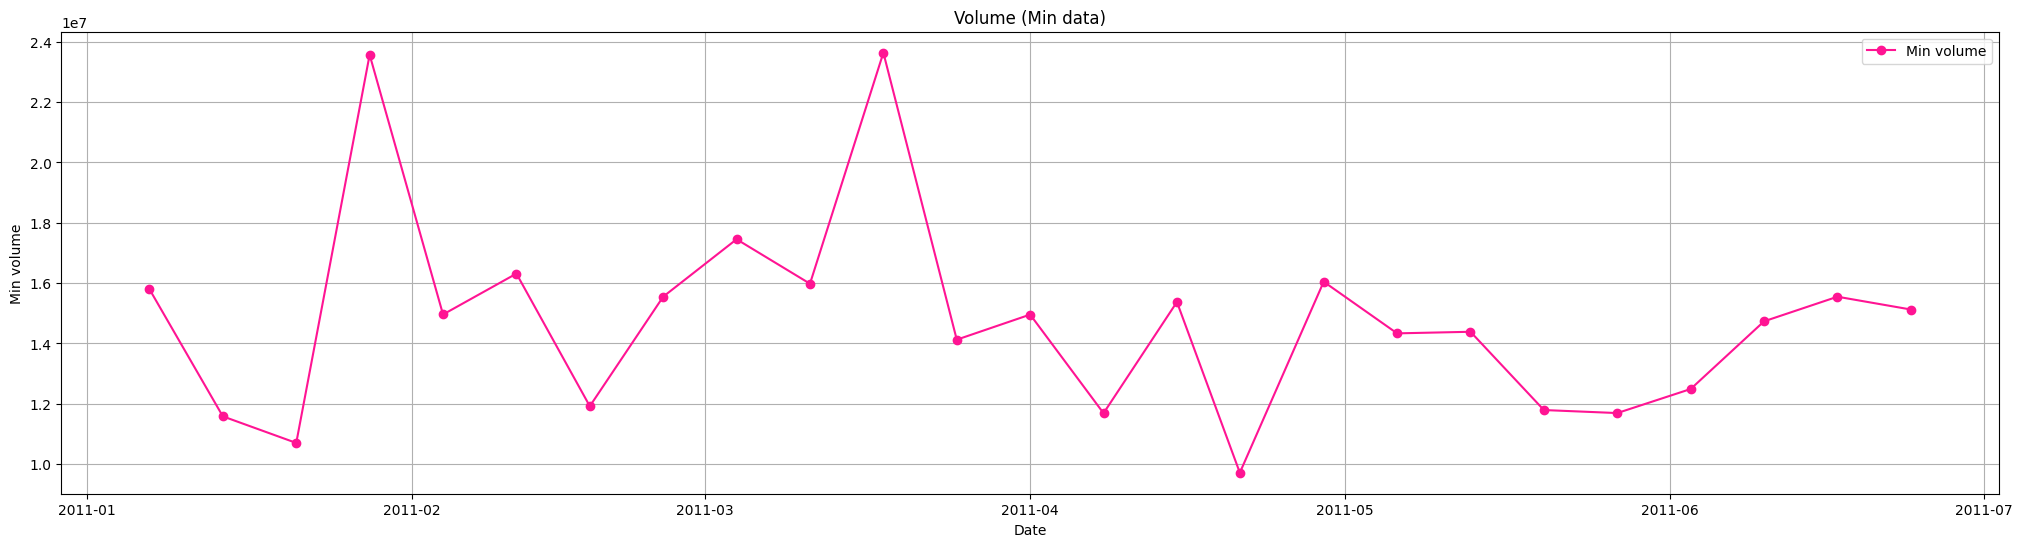

In [ ]:
fig = plt.figure(figsize=(25,6))

plt.plot(data.index, data['volume'], 'bo-', color='deeppink',  label='Min volume')
plt.title('Volume (Min data)')
plt.xlabel('Date')
plt.ylabel('Min volume')
plt.legend()
plt.grid()
plt.show()

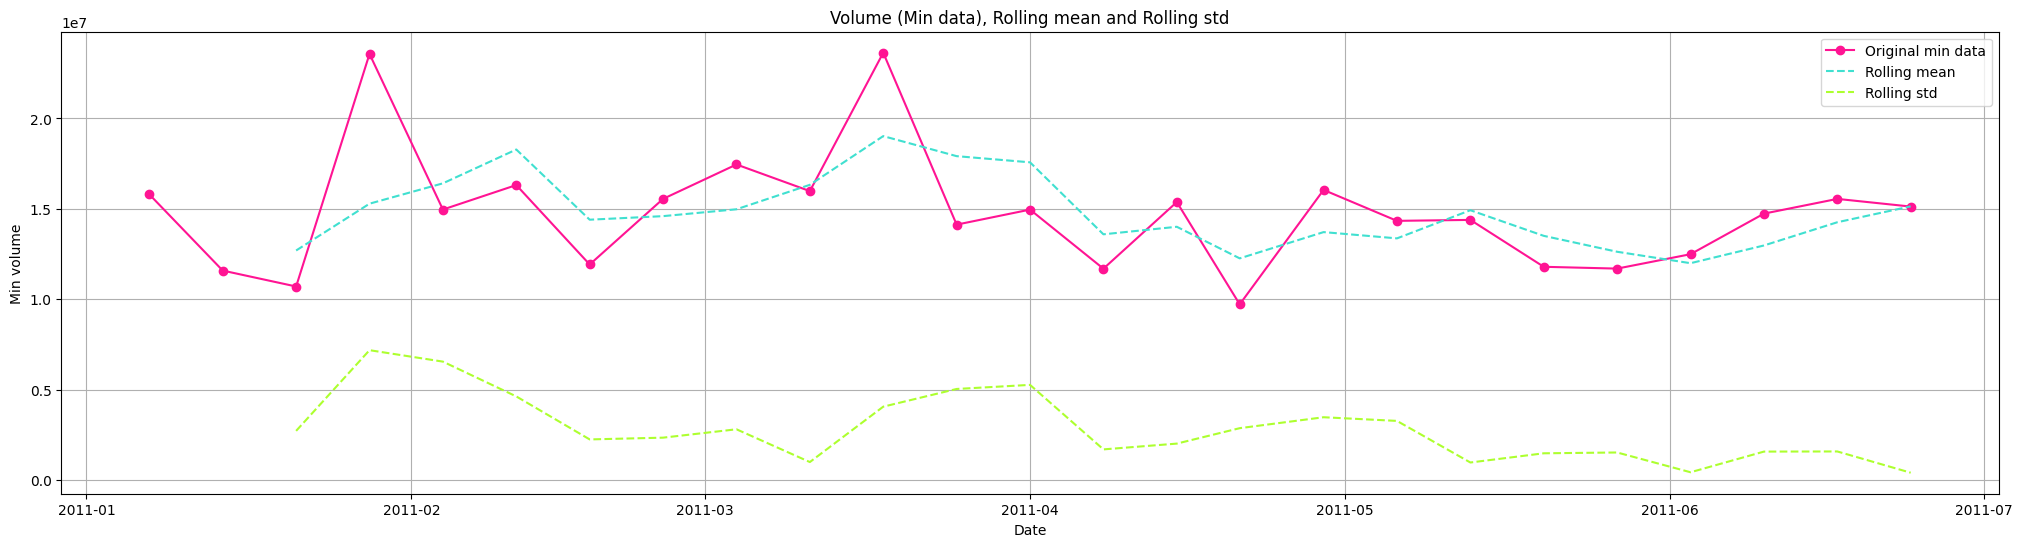

In [ ]:
rolling_mean = data['volume'].rolling(window=3).mean()
rolling_std = data['volume'].rolling(window=3).std()

fig = plt.figure(figsize=(25, 6))

original, = plt.plot(data.index, data['volume'], 'bo-',color='deeppink',label='Original min data')
roll_mean, = plt.plot(data.index, rolling_mean, 'r--',color='turquoise',label='Rolling mean')
roll_std, = plt.plot(data.index, rolling_std, 'g--',color='yellowgreen',label='Rolling std')

plt.title('Volume (Min data), Rolling mean and Rolling std')
plt.xlabel('Date')
plt.ylabel('Min volume')
plt.legend(handles=[original, roll_mean, roll_std])
plt.grid()
plt.show()

###### Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data['volume'], maxlag = 1)

print('T-test (Test Statistics): ', adf[0], '\n')
print('P-value: ', adf[1], '\n')
print('Valores críticos (Critical value): ', adf[4])

T-test (Test Statistics):  -4.976327289931515 

P-value:  2.471607005120194e-05 

Valores críticos (Critical value):  {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


Como el T-test es un valor mayor (menor en números negativos) a los valores críticos, se concluye que es una serie estacionaria, por lo que no es necesario realizar una transformación, sin embargo, para este caso las realizaremos para ver cómo se comportan los datos.

##### Transformaciones

In [ ]:
# Transformar el dataset
ts_log = np.log(data['volume'])
# Reemplaza infs con NaN
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
# Remover todos los valores inf
ts_log.dropna(inplace=True)

In [ ]:
# Media móvil de la serie
moving_avg = ts_log.rolling(window=3).mean() #12 fechas

# Sustraer la media móvil del dataset log-transformado
ts_log_moving_avg_diff = ts_log - moving_avg

# Remover valores NaN
ts_log_moving_avg_diff.dropna(inplace=True)

In [ ]:
# test_stationary for ts_log_moving_avg_diff
result = adfuller(ts_log_moving_avg_diff, autolag='AIC')

print('ADF Statistic: ', result[0])
print('P-value: ', result[1], '\n')
print('Valores críticos (Critical value): ')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic:  -2.7524699908036707
P-value:  0.06539036274984188 

Valores críticos (Critical value): 
	1%: -3.859
	5%: -3.042
	10%: -2.661


Después de realizar la tranformación a la serie ya estacionaria, se obtienen resultados de una serie no estacionaria, ya que el valor del estadístico ADF es positivo y el p-value es muy alto.

Se concluye que aplicar la transformación empeoró la estacionariedad de la serie de tiempo.

### Modelo de regresión de Poisson

##### Entrenamiento

In [ ]:
# Datasets de entrenamiento y prueba
mask = np.random.rand(len(data)) < 0.8

data_train = data[mask]
data_test = data[~mask]

print('Longitud del dataset de entrenamiento: ', len(data_train))
print('Longitud del dataset de prueba: ', len(data_test))

Longitud del dataset de entrenamiento:  20
Longitud del dataset de prueba:  5


In [ ]:
data.columns

Index(['high', 'low', 'volume', 'percent_change_price', 'MONTH', 'DAY_OF_WEEK',
       'DAY'],
      dtype='object')

In [ ]:
from patsy import dmatrices

expr = 'volume ~ high + low + percent_change_price + MONTH + DAY_OF_WEEK + DAY'

# Matrices de X y Y
y_train, X_train = dmatrices(expr, data=data_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data=data_test, return_type='dataframe')

print(X_train.head(5))
print(y_train.head(5))

            Intercept   high    low  percent_change_price  MONTH  DAY_OF_WEEK  \
date                                                                            
2011-01-07        1.0  14.69  13.80              -4.92066    1.0          4.0   
2011-01-14        1.0  15.25  14.09              -8.13204    1.0          4.0   
2011-01-21        1.0  15.16  13.94              -5.50398    1.0          4.0   
2011-01-28        1.0  14.26  13.40              -4.75570    1.0          4.0   
2011-02-04        1.0  14.47  13.64              -1.20156    2.0          4.0   

             DAY  
date              
2011-01-07   7.0  
2011-01-14  14.0  
2011-01-21  21.0  
2011-01-28  28.0  
2011-02-04   4.0  
                volume
date                  
2011-01-07  15797841.0
2011-01-14  11585909.0
2011-01-21  10705548.0
2011-01-28  23565688.0
2011-02-04  14960948.0


In [ ]:
# Statmodels = GLM class, Modelo de regresión de Poisson para el dataset de entrenamiento
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   20
Model:                            GLM   Df Residuals:                       13
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.1366e+06
Date:                Thu, 16 Nov 2023   Deviance:                   1.2273e+07
Time:                        20:39:48   Pearson chi2:                 1.28e+07
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.7586 

En el resumen del entrenamiento podemos ver que el método que se utiliza para hallar estimaciones de máxima verosimilitud de un modelo de Poisson GLM es el IRLS.

Se observan los coeficientes para cada variable independiente del modelo, así como el Log-Likelihood con un valor de -6.1366e+06, el cual da un indicio de ser un buen ajuste por su característica de 'menor negatividad'.

##### Prueba

In [ ]:
# Predicciones en el dataset de prueba
poisson_predictions = poisson_training_results.get_prediction(X_test)

# Summary_frame() regresa un DataFrame de Pandas
predictions_summary_frame = poisson_predictions.summary_frame()

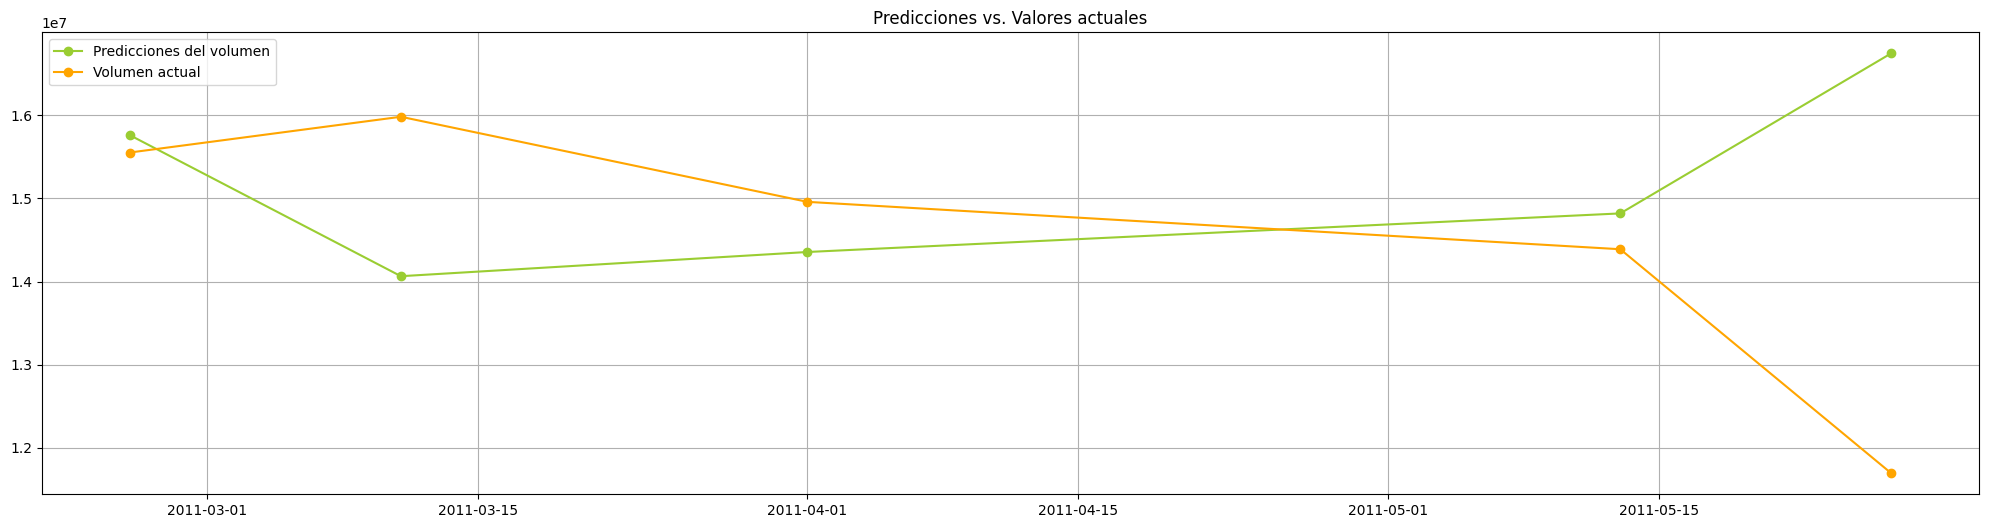

In [ ]:
predicted_volume = predictions_summary_frame['mean']
actual_volume = y_test['volume']

# Plot de las predicciones contra las reales
fig = plt.figure(figsize=(25,6))

predicted, = plt.plot(X_test.index, predicted_volume, 'go-', color='yellowgreen', label='Predicciones del volumen')
actual, = plt.plot(X_test.index, actual_volume, 'ro-', color='orange', label='Volumen actual')

plt.title('Predicciones vs. Valores actuales')
plt.legend(handles=[predicted, actual])
plt.grid()
plt.show()

###### MSE

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = sqrt(mean_squared_error(y_test, predicted_volume))
print('MSE: %.3f' % mse)

MSE: 2439391.769


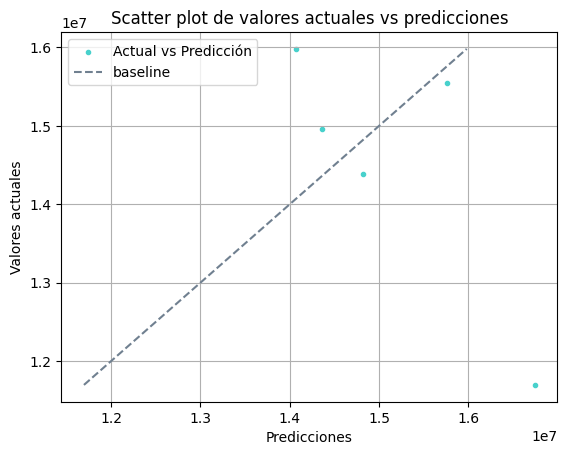

In [ ]:
# Scatter plot de valores actuales vs predicciones
fig = plt.figure()

plt.scatter(x=predicted_volume, y=actual_volume, marker='.', color='mediumturquoise', label='Actual vs Predicción')
plt.plot([actual_volume.min(), actual_volume.max()], [actual_volume.min(), actual_volume.max()], 'k--', color='slategrey', label='baseline')

plt.title('Scatter plot de valores actuales vs predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Valores actuales')
plt.legend()
plt.grid()
plt.show()

* Despues de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?

  * Los coeficientes del modelo muestran la relación entre cada variable predictora y la variable de respuesta (`volume`). Por ejemplo, parece haber una asociación negativa entre 'high' y el 'volumen', mientras que 'low', 'percent_change_price', 'MONTH', 'DAY_OF_WEEK', y 'DAY' están asociados positivamente.
  * Al deducir por los resultados, que los datos son estacionarios, esto sugiere que las propiedades estadísticas de la serie (media, varianza y covarianza) no cambian con el tiempo.
  * Aunque los puntos en el scatter plot están cerca de la línea de 45 grados (identidad), lo cual indica cierta concordancia entre las predicciones y los valores reales, el alto MSE obtenido sugiere que las predicciones no están lo suficientemente cerca de los valores reales en promedio.

* ¿Qué pase si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?

  * Si se intenta realizar una operación de forecasting o predicción con un modelo entrenado, se utiliza el modelo para prever valores futuros basados en los patrones y relaciones aprendidos a partir de los datos históricos. En el contexto de series de tiempo, esto implica predecir valores más allá de los datos observados en el conjunto de entrenamiento. Por lo tanto, cuanto más lejos se aleje en el tiempo de los datos conocidos, menos confiables pueden ser las predicciones, siendo éstas reflejadas en la pérdida de precisión del modelo. En nuestro caso, con el MSE tan elevado, es posible que las predicciones del modelo no sean confiables al realizar una operación de extrapolación.

### Autocorrelación y Autocorrelación parcial

In [ ]:
autocorrelation_lag1 = data['volume'].autocorr(lag=8)
print('One date lag: ', autocorrelation_lag1)

One date lag:  -0.25467190021204206


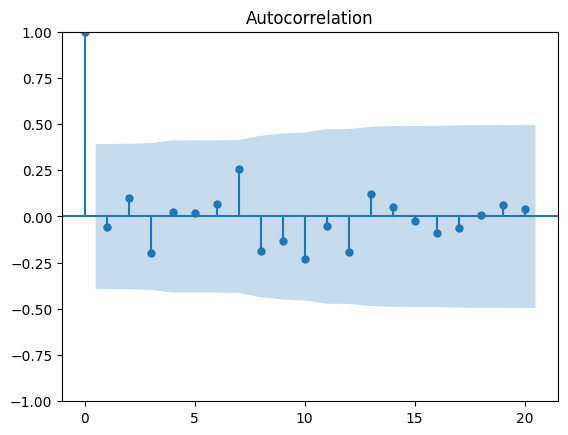

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['volume'], lags=20);

#plot_acf(ts_log, lags=20);

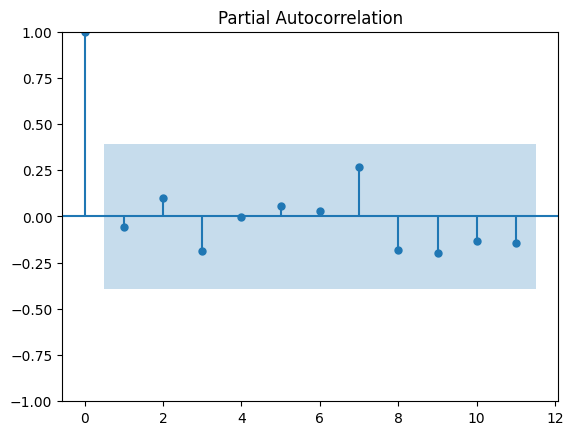

In [ ]:
plot_pacf(data['volume'], lags=11);

Tanto en la gráfica de autocorrelación como la de autocorrelación parcial, no se identifica alguna observación que sobrepase la sombre de color azul, por lo cual se deduce que ninguna observación está lo suficientemente autocorrelacionada.

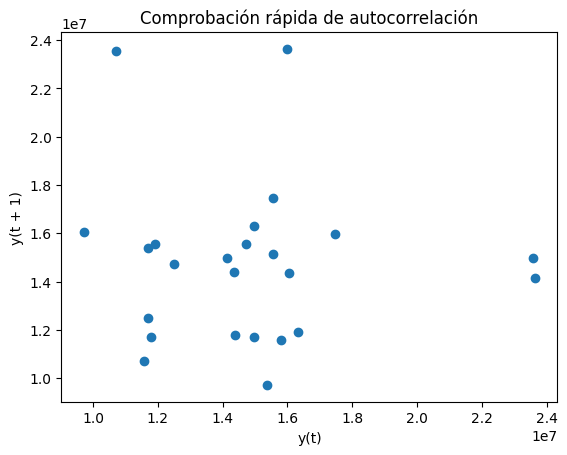

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(data['volume'])
pyplot.title('Comprobación rápida de autocorrelación')
pyplot.show()

Se puede observar que los puntos no siguen ninguna tendencia en particular y solo están dispersos en la gráfica aunque concentrados, en su mayoría, en la parte inferior izquierda.

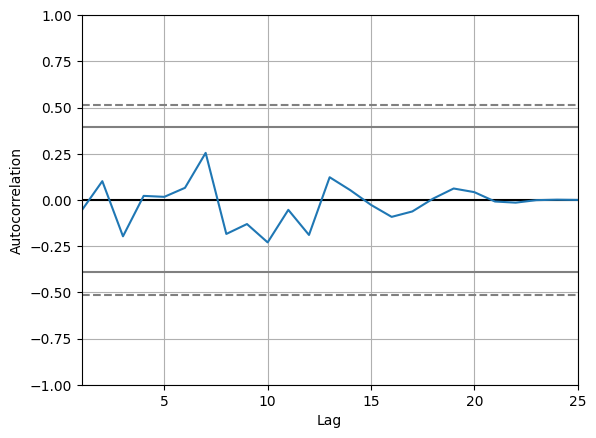

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['volume'])
pyplot.show()

Asimismo, con el gráfico de autocorrelación, se demuestra nuevamente que los datos no siguen una tendencia en específico.

### Modelo de AutoRegresión (AR)

In [ ]:
series = data['volume'].copy()
print(series)

date
2011-01-07    15797841
2011-01-14    11585909
2011-01-21    10705548
2011-01-28    23565688
2011-02-04    14960948
2011-02-11    16315175
2011-02-18    11922670
2011-02-25    15551183
2011-03-04    17453306
2011-03-11    15980871
2011-03-18    23633329
2011-03-25    14126721
2011-04-01    14958061
2011-04-08    11690792
2011-04-15    15375510
2011-04-21     9718851
2011-04-29    16046782
2011-05-06    14335889
2011-05-13    14388418
2011-05-20    11795580
2011-05-27    11695384
2011-06-03    12491882
2011-06-10    14734714
2011-06-17    15549946
2011-06-24    15126028
Name: volume, dtype: int64


##### Predicción a corto-plazo

In [ ]:
# División del dataset en sets de entrenamiento y prueba
X = series.values

size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

print('Tamaño del conjunto de prueba: ', len(test))

# División del índice en sets de entrenamiento y prueba
ind_train, ind_test = data.index[0:size], data.index[size:len(X)]

Tamaño del conjunto de prueba:  5


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Entrenamiento del modelo de AutoRegresión
model = AutoReg(train, lags=9)
model_fit = model.fit()
print('Coeficientes: %s' % model_fit.params)

Coeficientes: [ 4.72760343e+07 -2.43257305e-01  4.84306858e-01 -9.06920533e-02
 -2.00597568e-01 -8.38064503e-01 -1.18883128e-01  2.21820602e-01
 -6.15665699e-01 -6.55900914e-01]


In [ ]:
predictions = model_fit.predict(start=len(train),
                                end=len(train)+len(test)-1,
                                dynamic=False)
for i in range(len(predictions)):
  print('Predicho=%f, esperado=%f' % (predictions[i], test[i]))

Predicho=21001437.650350, esperado=11695384.000000
Predicho=15497635.434776, esperado=12491882.000000
Predicho=20820789.327352, esperado=14734714.000000
Predicho=19174423.065906, esperado=15549946.000000
Predicho=22406959.199637, esperado=15126028.000000


###### MSE y Gráfica

In [ ]:
mse = sqrt(mean_squared_error(test, predictions))
print('MSE: %.3f' % mse)

MSE: 6305970.096


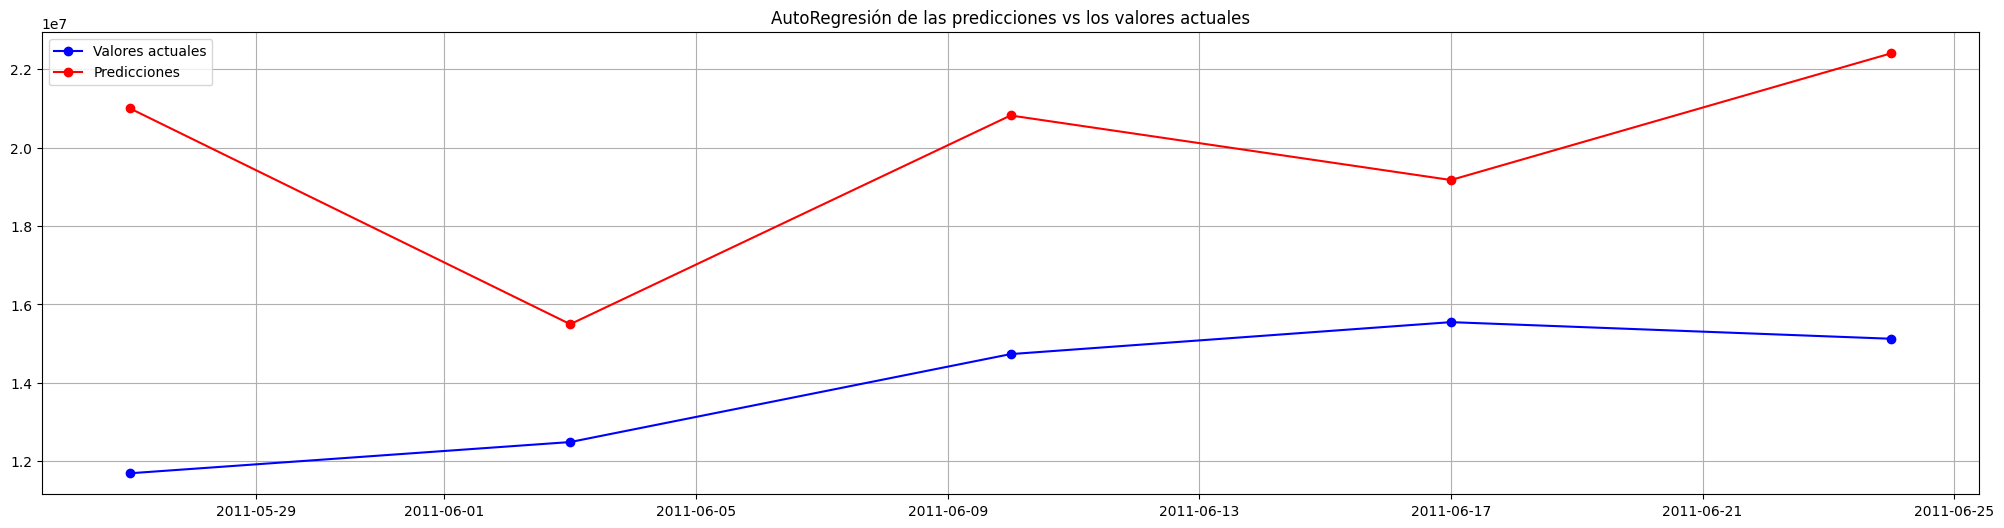

In [ ]:
# Grafico the los predichos vs los valores actuales del conjunto de prueba
fig = plt.figure(figsize=(25,6))

actual, = plt.plot(ind_test, test, 'bo-', label='Valores actuales')
predicted, = plt.plot(ind_test, predictions, 'ro-', label='Predicciones')

plt.title('AutoRegresión de las predicciones vs los valores actuales')
plt.legend(handles=[actual, predicted])
plt.grid()
plt.show()

##### Predicción continua

In [ ]:
train_history = list(train)
predictions = list()

# Validación walk-forward
for t in range(len(test)):
  model = AutoReg(train_history, lags=6)
  model_fit = model.fit()

  y_hat = model_fit.forecast()[0]
  predictions.append(y_hat)

  y_real = test[t]
  train_history.append(y_real)

  print('Predicción=%f, esperado=%f' % (y_hat, y_real))

Predicción=14395135.826583, esperado=11695384.000000
Predicción=13532296.747583, esperado=12491882.000000
Predicción=13859968.875707, esperado=14734714.000000
Predicción=14653022.934981, esperado=15549946.000000
Predicción=15177039.295990, esperado=15126028.000000


###### MSE y Gráfica

In [ ]:
mse = sqrt(mean_squared_error(test, predictions))
print('MSE: %.3f' % mse)

MSE: 1410203.882


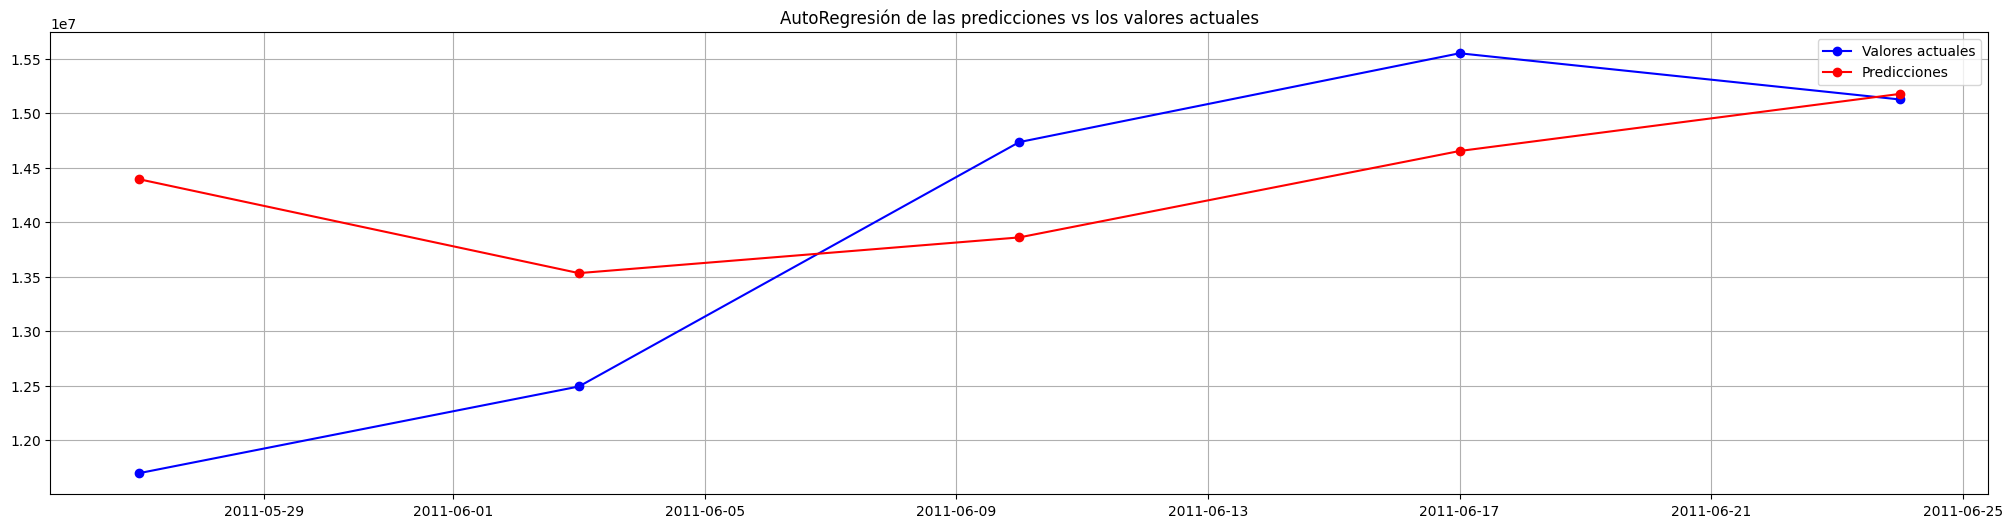

In [ ]:
# Grafico the los predichos vs los valores actuales del conjunto de prueba
fig = plt.figure(figsize=(25,6))

actual, = plt.plot(ind_test, test, 'bo-', label='Valores actuales')
predicted, = plt.plot(ind_test, predictions, 'ro-', label='Predicciones')

plt.title('AutoRegresión de las predicciones vs los valores actuales')
plt.legend(handles=[actual, predicted])
plt.grid()
plt.show()

* Compare el resultado con ambos resultados. (error, desviación de los datos predichos con el tiempo, etc.)

  * Error (MSE): La predicción continua( 1410203.882) tiene un MSE significativamente menor que la predicción a corto plazo(6305970.096), lo que sugiere una mejora en la precisión de las predicciones.
  * Gráficas: La gráfica de la predicción a corto plazo muestra las predicciones en rojo vs los valores actuales en azul y se nota una gran diferencia entre ellas, ya que ambas ni siquiera llegan a tocarse. Mientras que en la gráfica de la predicción continua, las líneas por lo menos se cruzan y los puntos están más cercanos en cuanto a su valor actual y el predicho.
  * Discrepancia entre Predicciones y Valores Reales: Aunque ambas predicciones muestran discrepancias, la predicción continua parece ajustarse mejor a los datos reales a lo largo del tiempo en comparación con la predicción a corto plazo.

### Modelo ARIMA

##### AIC - Estimación de parámetros

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

best_aic = float('inf')
best_order = None
#aic_values = []

for p in range(1,21):
  try:
    model = ARIMA(train, order=(p, 0 ,0))
    model_fit = model.fit()
    aic = model_fit.aic
    print(f'AR({p}): AIC = {aic:.2f}')

    if aic < best_aic:
      best_aic = aic
      best_order = (p, 0, 0)
  except Exception as e:
    print(f'Error for AR({p}): {e}')

print(f'\nBest AR order: {best_order} with AIC: {best_aic:.2f}')

AR(1): AIC = 665.48
AR(2): AIC = 667.43
AR(3): AIC = 668.52
AR(4): AIC = 672.64
AR(5): AIC = 674.03
AR(6): AIC = 675.67
AR(7): AIC = 675.76
AR(8): AIC = 675.53
AR(9): AIC = 823.57
Error for AR(10): LU decomposition error.
AR(11): AIC = 327997666889.69
Error for AR(12): LU decomposition error.
AR(13): AIC = 12761340772.31
Error for AR(14): LU decomposition error.
AR(15): AIC = 32273142085.38
AR(16): AIC = 12743108817.67
AR(17): AIC = 7497179650.42
AR(18): AIC = 1115704943.03
AR(19): AIC = 695.56
AR(20): AIC = 697.56

Best AR order: (1, 0, 0) with AIC: 665.48


In [ ]:
series = data['volume'].copy()
print(series)

series.index = series.index.to_period('M')
print('\n', series)

date
2011-01-07    15797841
2011-01-14    11585909
2011-01-21    10705548
2011-01-28    23565688
2011-02-04    14960948
2011-02-11    16315175
2011-02-18    11922670
2011-02-25    15551183
2011-03-04    17453306
2011-03-11    15980871
2011-03-18    23633329
2011-03-25    14126721
2011-04-01    14958061
2011-04-08    11690792
2011-04-15    15375510
2011-04-21     9718851
2011-04-29    16046782
2011-05-06    14335889
2011-05-13    14388418
2011-05-20    11795580
2011-05-27    11695384
2011-06-03    12491882
2011-06-10    14734714
2011-06-17    15549946
2011-06-24    15126028
Name: volume, dtype: int64

 date
2011-01    15797841
2011-01    11585909
2011-01    10705548
2011-01    23565688
2011-02    14960948
2011-02    16315175
2011-02    11922670
2011-02    15551183
2011-03    17453306
2011-03    15980871
2011-03    23633329
2011-03    14126721
2011-04    14958061
2011-04    11690792
2011-04    15375510
2011-04     9718851
2011-04    16046782
2011-05    14335889
2011-05    14388418
2011-0

##### Predicción continua

In [ ]:
# Modelo fit
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit()
print('Coeficientes:\n%s' % model_fit.params)

Coeficientes:
ar.L1    -7.586348e-01
ar.L2    -3.360359e-01
ar.L3    -1.832953e-01
ar.L4    -4.977052e-01
ar.L5    -4.582331e-01
ar.L6    -1.348173e-01
ar.L7     2.325648e-01
sigma2    6.025548e+12
dtype: float64


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                   25
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -396.427
Date:                Thu, 16 Nov 2023   AIC                            808.854
Time:                        21:18:46   BIC                            818.278
Sample:                             0   HQIC                           811.354
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7586      0.190     -3.994      0.000      -1.131      -0.386
ar.L2         -0.3360      0.281     -1.195      0.232      -0.887       0.215
ar.L3         -0.1833      0.241     -0.761      0.4

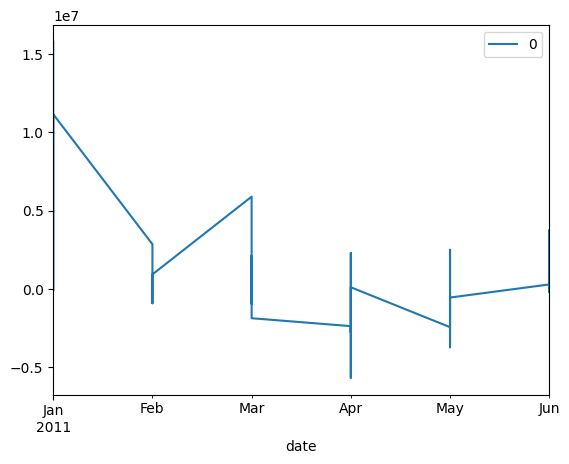

In [ ]:
# Gráfico en línea de los residuos
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

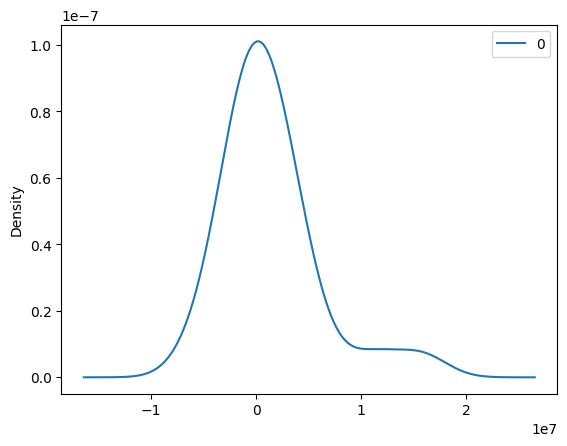

In [ ]:
# Gráfico de densidad de los residuos
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# División en conjuntos de entrenamiento y prueba
X = series.values

size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]

# División de los índices en conjuntos de entrenamiento y prueba
ind_train, ind_test = data.index[0:size], data.index[size:len(X)]

In [ ]:
history = list(train)
predictions = list()

# Validación walk-forward
for t in range(len(test)):
  model = ARIMA(history, order=(1,1,0))
  model_fit = model.fit()

  y_hat = model_fit.forecast()[0]
  predictions.append(y_hat)

  y_real = test[t]
  history.append(y_real)

  print('Predicción=%f, esperado=%f' % (y_hat, y_real))

Predicción=12106680.100035, esperado=14734714.000000
Predicción=13655876.702132, esperado=15549946.000000
Predicción=15162087.816123, esperado=15126028.000000


###### MSE y Gráfica

In [ ]:
mse = sqrt(mean_squared_error(test, predictions))
print('MSE: %.3f' % mse)

MSE: 1870415.372


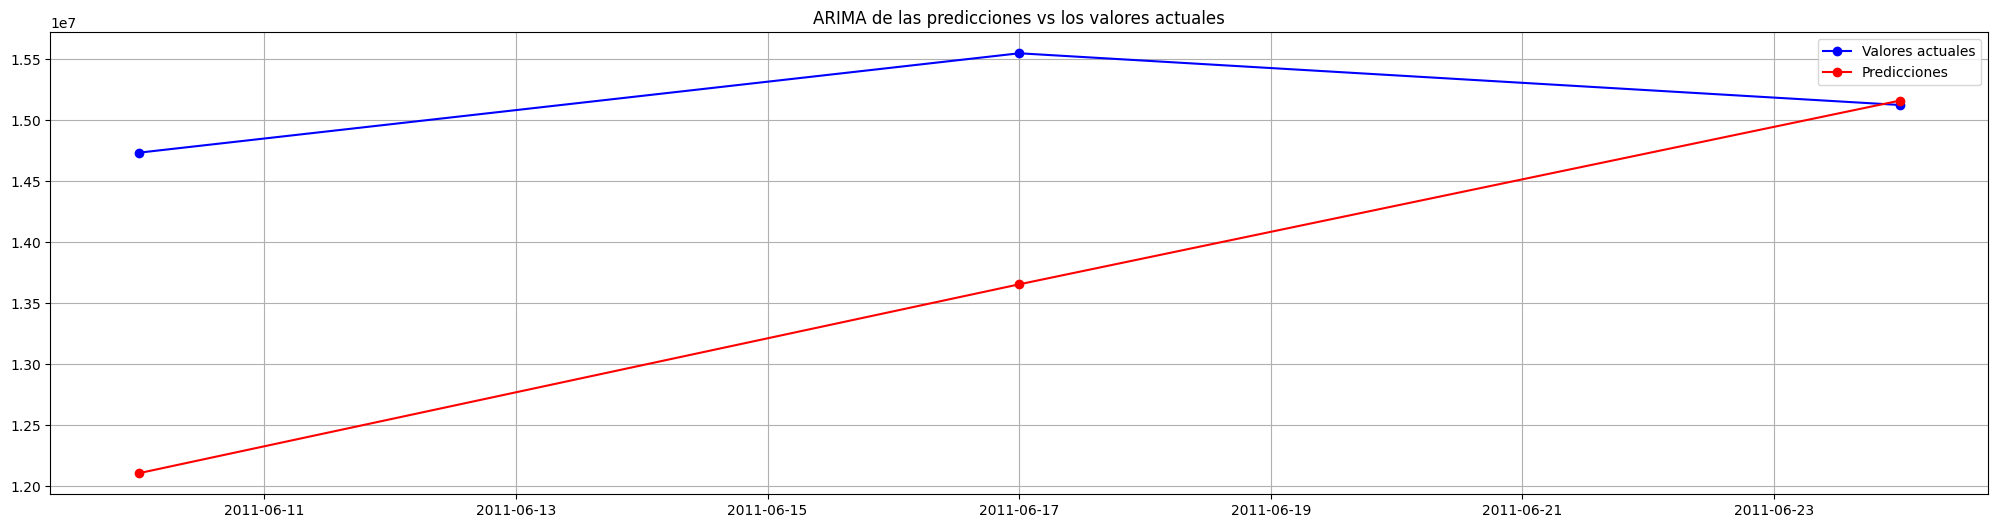

In [ ]:
# Grafico the los predichos vs los valores actuales del conjunto de prueba
fig = plt.figure(figsize=(25,6))

actual, = plt.plot(ind_test, test, 'bo-', label='Valores actuales')
predicted, = plt.plot(ind_test, predictions, 'ro-', label='Predicciones')

plt.title('ARIMA de las predicciones vs los valores actuales')
plt.legend(handles=[actual, predicted])
plt.grid()
plt.show()

* Compare los resultado con el modelo AR. (En predicción continua: error, desviación de los datos predichos con el tiempo, etc.)

  * ARIMA:

      * Orden del Modelo ARIMA: El modelo ARIMA identificado es ARIMA(7, 1, 0) con un AIC de 808.854. Sin embargo, de acuerdo a los resultados arrojados el ideal es desde el primero con un modelo ARIMA(1,1,0) y un AIC de 665.48.
      * Parámetros del Modelo: Los coeficientes de los términos autorregresivos (AR) muestran diferentes magnitudes y significancia estadística variable.
      * MSE: El error cuadrático medio (MSE) es de 1870415.372, lo que indica que, en promedio, las predicciones están relativamente cerca de los valores reales.

  * Comparación con Modelo AR:

      * Predicciones Continuas: Las predicciones parecen ser razonablemente precisas al final del período, pero inicialmente tienen discrepancias considerables.
      * Residuos: Los gráficos de residuos muestran una distribución con forma de campana, lo cual sugiere cierta aleatoriedad y falta de patrones en los residuos.

* ¿En que situaciones cree que sería mejor utilizar un modelo AR o un ARIMA?

  * Para este caso como los datos son estacionarios y no hay componentes de tendencia o estacionalidad, un modelo AR continuo puede ser suficiente y más fácil de interpretar. Así lo pudimos comprobar comparando los datos con distintos modelos y obteniendo los mejores resultados de MSE, predicciones y gráficas con el modelo de AutoRegresión continua.